In [1]:
import sys
sys.path.append("Python")
from biorxiv import bioRxivScraper

In [2]:

scraper = bioRxivScraper()

scraped_content = scraper.by_year(start_year=2020, end_year=2021)

https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Behavior%20and%20Cognition%20limit_from%3A2020-1-1%20limit_to%3A2020-1-2%20numresults%3A100000
https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Behavior%20and%20Cognition%20limit_from%3A2020-1-2%20limit_to%3A2020-1-3%20numresults%3A100000
https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Behavior%20and%20Cognition%20limit_from%3A2020-1-3%20limit_to%3A2020-1-4%20numresults%3A100000
https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Behavior%20and%20Cognition%20limit_from%3A2020-1-4%20limit_to%3A2020-1-5%20numresults%3A100000
https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Behavior%20and%20Cognition%20limit_from%3A2020-1-5%20limit_to%3A2020-1-6%20numresults%3A100000
https://www.biorxiv.org/search/%20jcode%3Abiorxiv%20subject_collection_code%3AAnimal%20Beh

KeyboardInterrupt: 

## Visualizing scraped data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle("physics.pkl")
print(df.shape)
df.head()

(1067957, 4)


,title,abstract,created,arxiv_id
0,In quest of a generalized Callias index theorem,We give a prescription for how to compute th...,2007-04-02,0704.0018
1,Molecular Synchronization Waves in Arrays of A...,Spatiotemporal pattern formation in a produc...,2007-03-31,0704.0021
2,The discrete dipole approximation for simulati...,In this manuscript we investigate the capabi...,2007-03-31,0704.0037
3,Nonequilibrium entropy limiters in lattice Bol...,We construct a system of nonequilibrium entr...,2007-03-31,0704.0043
4,Quantum Field Theory on Curved Backgrounds. II...,We study space-time symmetries in scalar qua...,2007-03-31,0704.0052


In [12]:
#clean data
df['created'] = pd.to_datetime(df['created'])
df = df[df['created']>'01-01-2000']
print(df.shape)

(959748, 4)


In [13]:
df['Week'] = pd.to_datetime(df['created']) - pd.to_timedelta(7, unit='d')
print(df.shape)
df.head()

(959748, 5)


,title,abstract,created,arxiv_id,Week
0,In quest of a generalized Callias index theorem,We give a prescription for how to compute th...,2007-04-02,0704.0018,2007-03-26
1,Molecular Synchronization Waves in Arrays of A...,Spatiotemporal pattern formation in a produc...,2007-03-31,0704.0021,2007-03-24
2,The discrete dipole approximation for simulati...,In this manuscript we investigate the capabi...,2007-03-31,0704.0037,2007-03-24
3,Nonequilibrium entropy limiters in lattice Bol...,We construct a system of nonequilibrium entr...,2007-03-31,0704.0043,2007-03-24
4,Quantum Field Theory on Curved Backgrounds. II...,We study space-time symmetries in scalar qua...,2007-03-31,0704.0052,2007-03-24


In [14]:
#count by week
week_count = df.groupby([pd.Grouper(key='Week', freq='W-MON')]).count()
week_count['count'] = week_count['title']
week_count = week_count.drop(['title','abstract','created','arxiv_id'],axis=1)
week_count.head()

,count
Week,
1999-12-27,93
2000-01-03,462
2000-01-10,529
2000-01-17,514
2000-01-24,518


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


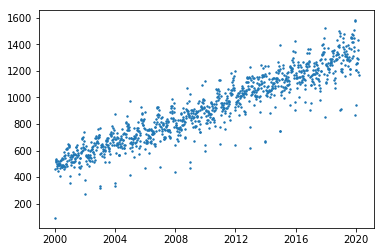

In [15]:
plt.scatter(week_count.index,week_count['count'],s=2)

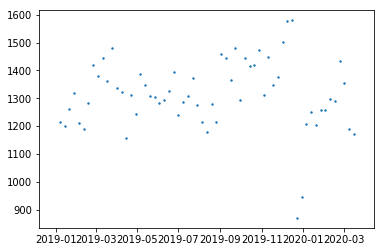

In [16]:
this_year_week = week_count[week_count.index>='01-01-2019']
plt.scatter(this_year_week.index,this_year_week['count'],s=2)

In [17]:
#count by day
day_count = df.groupby(['created']).count()
day_count['count'] = day_count['title']
day_count = day_count.drop(['title','abstract','arxiv_id','Week'],axis=1)
day_count.head()

,count
created,
2000-01-02,18
2000-01-03,75
2000-01-04,69
2000-01-05,82
2000-01-06,69


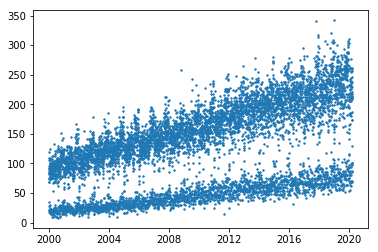

In [18]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
plt.scatter(day_count.index,day_count['count'],s=2)

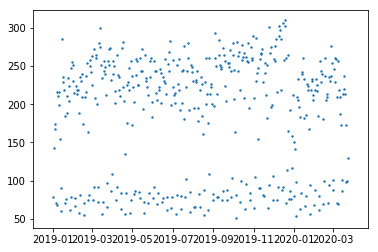

In [19]:
this_year_day = day_count[day_count.index>='01-01-2019']
plt.scatter(this_year_day.index,this_year_day['count'],s=2)

In [16]:
####JUNK####
from crossref_commons.iteration import iterate_publications_as_json
from datetime import datetime
filter = {'type': 'journal-article'}
queries = {'query.bibliographic': 'battery'}
counts = {}
for p in iterate_publications_as_json(max_results=10**4, queries=queries, filter=filter):
    date = p['indexed']['date-parts'][0]
    strdate = ''.join(str(e) for e in date)
    if strdate in counts.keys():
        counts[strdate] +=1
    else:
        counts[strdate] = 1
print(counts)



{'20191118': 920, '20191119': 1407, '20191120': 1124, '20191121': 1002, '20191122': 1459, '20191123': 2100, '20191124': 809, '20191125': 1179}
